In [29]:
import pandas as pd


df = pd.read_csv("C:/Users/prati/Downloads/diabetes.csv")
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
df.info()
#split dataset in features and target variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

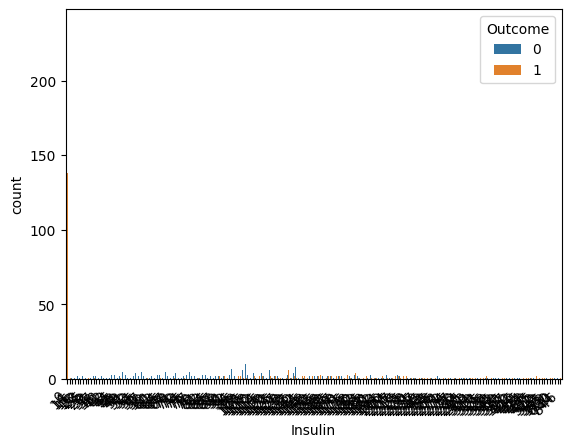

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='Insulin',hue='Outcome')
plt.xticks(rotation=45, ha='right');


In [21]:
pre_df = pd.get_dummies(df,columns=['Insulin'],drop_first=True)
pre_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_14,Insulin_15,...,Insulin_495,Insulin_510,Insulin_540,Insulin_543,Insulin_545,Insulin_579,Insulin_600,Insulin_680,Insulin_744,Insulin_846
0,6,148,72,35,33.6,0.627,50,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,85,66,29,26.6,0.351,31,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,183,64,0,23.3,0.672,32,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,89,66,23,28.1,0.167,21,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,137,40,35,43.1,2.288,33,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('Outcome', axis=1)
y = pre_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [25]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5078740157480315
F1 Score: 0.5488162905583664


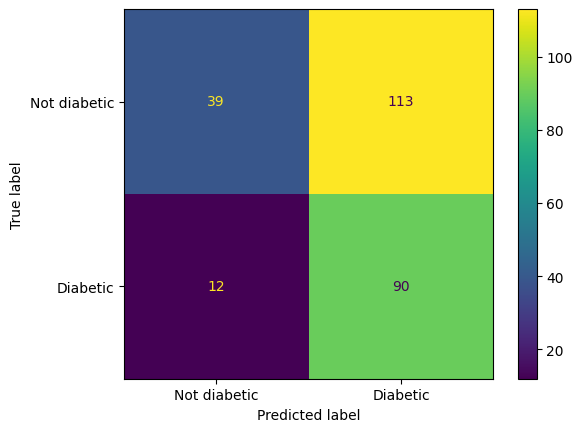

In [27]:
labels = ["Not diabetic", "Diabetic"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();